In [6]:
!python --version

Python 3.10.9


In [7]:
#! runs in conda   % in local environment
#!conda info

In [8]:
# %pip install ribs==0.4.0
#import ribs
#print (ribs.__version__)

In [9]:
import random
random.seed(19)
import numpy as np
import pandas as pd
# #from tqdm import tqdm
import matplotlib.pyplot as plt
import math

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler

from ribs.visualize import grid_archive_heatmap
##needs numpy 1.23.1


In [10]:
#data reads the kaggle file
data = pd.read_csv('./paper/train2.csv',)
data.drop('education', axis=1, inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education2            52399 non-null  float64
 4   male                  54808 non-null  int64  
 5   female                54808 non-null  int64  
 6   recruitment_channel   54808 non-null  object 
 7   no_of_trainings       54808 non-null  int64  
 8   age                   54808 non-null  int64  
 9   previous_year_rating  50684 non-null  float64
 10  length_of_service     54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 5.9+ MB


In [16]:
data.head()

,employee_id,department,region,education2,male,female,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,3.0,0,1,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,2.0,1,0,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,2.0,1,0,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,2.0,1,0,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,2.0,1,0,other,1,45,3.0,2,0,73,0


In [27]:
#unbiased
thres = 34
data1 = data[(data['female']==1) & (data['age']<thres) & (data['is_promoted'] == 1)].sample(716)
data1 = pd.concat([data1, data[(data['female']==1) & (data['age']<thres) & (data['is_promoted'] == 0)].sample(716)])
data1 = pd.concat([data1, data[(data['female']==1) & (data['age']>=thres) & (data['is_promoted'] == 1)].sample(716)])
data1 = pd.concat([data1, data[(data['female']==1) & (data['age']>=thres) & (data['is_promoted'] == 0)].sample(716)])
data1 = pd.concat([data1, data[(data['male']==1) & (data['age']<thres)& (data['is_promoted'] == 1)].sample(716)])
data1 = pd.concat([data1, data[(data['male']==1) & (data['age']<thres)& (data['is_promoted'] == 0)].sample(716)])
data1 = pd.concat([data1, data[(data['male']==1) & (data['age']>=thres)& (data['is_promoted'] == 1)].sample(716)])
data1 = pd.concat([data1, data[(data['male']==1) & (data['age']>=thres)& (data['is_promoted'] == 0)].sample(716)])
data1.shape

(5728, 14)

In [28]:
#Male bias same sample size
thres = 34
data2 = data[(data['female']==1) & (data['age']<thres) & (data['is_promoted'] == 1)].sample(380)
data2 = pd.concat([data2, data[(data['female']==1) & (data['age']<thres) & (data['is_promoted'] == 0)].sample(716)])
data2 = pd.concat([data2, data[(data['female']==1) & (data['age']>=thres) & (data['is_promoted'] == 1)].sample(380)])
data2 = pd.concat([data2, data[(data['female']==1) & (data['age']>=thres) & (data['is_promoted'] == 0)].sample(716)])
data2 = pd.concat([data2, data[(data['male']==1) & (data['age']<thres)& (data['is_promoted'] == 1)].sample(716)])
data2 = pd.concat([data2, data[(data['male']==1) & (data['age']<thres)& (data['is_promoted'] == 0)].sample(380)])
data2 = pd.concat([data2, data[(data['male']==1) & (data['age']>=thres)& (data['is_promoted'] == 1)].sample(716)])
data2 = pd.concat([data2, data[(data['male']==1) & (data['age']>=thres)& (data['is_promoted'] == 0)].sample(380)])
data2.shape

(4384, 14)

In [29]:
#Higher male sample size
thres = 34
data3 = data[(data['female']==1) & (data['age']<thres) & (data['is_promoted'] == 1)].sample(380)
data3 = pd.concat([data3, data[(data['female']==1) & (data['age']<thres) & (data['is_promoted'] == 0)].sample(716)])
data3 = pd.concat([data3, data[(data['female']==1) & (data['age']>=thres) & (data['is_promoted'] == 1)].sample(380)])
data3 = pd.concat([data3, data[(data['female']==1) & (data['age']>=thres) & (data['is_promoted'] == 0)].sample(716)])
data3 = pd.concat([data3, data[(data['male']==1) & (data['age']<thres)& (data['is_promoted'] == 1)].sample(1476)])
data3 = pd.concat([data3, data[(data['male']==1) & (data['age']<thres)& (data['is_promoted'] == 0)].sample(716)])
data3 = pd.concat([data3, data[(data['male']==1) & (data['age']>=thres)& (data['is_promoted'] == 1)].sample(1476)])
data3 = pd.concat([data3, data[(data['male']==1) & (data['age']>=thres)& (data['is_promoted'] == 0)].sample(716)])
data3.shape

(6576, 14)

In [30]:
#data set bias to male if old and to women if young
thres = 34
data4 = data[(data['female']==1) & (data['age']<thres) & (data['is_promoted'] == 1)].sample(751)
data4 = pd.concat([data4, data[(data['female']==1) & (data['age']<thres) & (data['is_promoted'] == 0)].sample(376)])
data4 = pd.concat([data4, data[(data['female']==1) & (data['age']>=thres) & (data['is_promoted'] == 1)].sample(376)])
data4 = pd.concat([data4, data[(data['female']==1) & (data['age']>=thres) & (data['is_promoted'] == 0)].sample(751)])
data4 = pd.concat([data4, data[(data['male']==1) & (data['age']<thres)& (data['is_promoted'] == 1)].sample(376)])
data4 = pd.concat([data4, data[(data['male']==1) & (data['age']<thres)& (data['is_promoted'] == 0)].sample(751)])
data4 = pd.concat([data4, data[(data['male']==1) & (data['age']>=thres)& (data['is_promoted'] == 1)].sample(751)])
data4 = pd.concat([data4, data[(data['male']==1) & (data['age']>=thres)& (data['is_promoted'] == 0)].sample(376)])
data4.shape


(4508, 14)

In [31]:
#data set bias to male if old and, women is unbiased
thres = 34
data9 = data[(data['female']==1) & (data['age']<thres) & (data['is_promoted'] == 1)].sample(564)
data9 = pd.concat([data9, data[(data['female']==1) & (data['age']<thres) & (data['is_promoted'] == 0)].sample(564)])
data9 = pd.concat([data9, data[(data['female']==1) & (data['age']>=thres) & (data['is_promoted'] == 1)].sample(564)])
data9 = pd.concat([data9, data[(data['female']==1) & (data['age']>=thres) & (data['is_promoted'] == 0)].sample(564)])
data9 = pd.concat([data9, data[(data['male']==1) & (data['age']<thres)& (data['is_promoted'] == 1)].sample(376)])
data9 = pd.concat([data9, data[(data['male']==1) & (data['age']<thres)& (data['is_promoted'] == 0)].sample(751)])
data9 = pd.concat([data9, data[(data['male']==1) & (data['age']>=thres)& (data['is_promoted'] == 1)].sample(751)])
data9 = pd.concat([data9, data[(data['male']==1) & (data['age']>=thres)& (data['is_promoted'] == 0)].sample(376)])
data9.shape


(4510, 14)

In [32]:
#balances age, biases gender
data10 = data[data['female']==1]
data10 = data10.append(data[(data['male']==1) & (data['age']<34) & (data['is_promoted']==1)].sample(frac=1440/1725))
data10 = data10.append(data[(data['male']==1) & (data['age']<34) & (data['is_promoted']==0)].sample(frac=6660/18245))
data10 = data10.append(data[(data['male']==1) & (data['age']>=34) & (data['is_promoted']==1)])
data10 = data10.append(data[(data['male']==1) & (data['age']>=34) & (data['is_promoted']==0)].sample(frac=6254/17050))
data10.shape

(32142, 14)

In [33]:
g = data1
#display(g.describe())
print('n\t\t\t\t', g.shape[0])
print('Total promotion rate\t\t', round(g['is_promoted'].mean(), 2))
print('Male proportion in dataset\t', round(g['male'].mean(), 2))
print('Male promotion rate\t\t', round(g[g['male']==1]['is_promoted'].mean(), 2))
print('Female proportion in dataset\t', round(g['female'].mean(), 2))
print('Female promotion rate\t\t', round(g[g['female']==1]['is_promoted'].mean(), 2))
print('Young proportion in dataset\t', round(len(g[g['age']<thres])/len(g), 2))
print('Young promotion rate\t\t', round(g[g['age']<thres]['is_promoted'].mean(), 2))
print('Old proportion in dataset\t', round(len(g[g['age']>=thres])/len(g), 2))
print('Old promotion rate\t\t', round(g[g['age']<thres]['is_promoted'].mean(), 2),'\n')

print('\t&n&Proportion&Promotion rate\\\\')
print('\tAll&',g.shape[0],'&1.00&',round(g['is_promoted'].mean(), 2),'\\\\')
print('\tMale&',
      len(g[g['male']==1]),'&',
      round(g['male'].mean(), 2),'&',
      round(g[g['male']==1]['is_promoted'].mean(), 2),'\\\\')
print('\tFemale&',
      len(g[g['female']==1]),'&',
      round(g['female'].mean(), 2),'&',
      round(g[g['female']==1]['is_promoted'].mean(), 2),'\\\\')
print('\tYoung&',
      len(g[g['age']<thres]),'&',
      round(len(g[g['age']<thres])/len(g), 2),'&',
      round(g[g['age']<thres]['is_promoted'].mean(), 2),'\\\\')
print('\tOld&',
      len(g[g['age']>=thres]),'&',
      round(len(g[g['age']>=thres])/len(g), 2),'&',
      round(g[g['age']>=thres]['is_promoted'].mean(), 2),'\\\\\n')

print('\tPromotion rate&Young&Old\\\\')
print('\tMale&',
      round(g[(g['male']==1)&(g['age']<thres)]['is_promoted'].mean(),2),'&',
      round(g[(g['male']==1)&(g['age']>=thres)]['is_promoted'].mean(),2),'\\\\')
print('\tFemale&',
      round(g[(g['female']==1)&(g['age']<thres)]['is_promoted'].mean(),2),'&',
      round(g[(g['female']==1)&(g['age']>=thres)]['is_promoted'].mean(),2),'\\\\')




n				 5728
Total promotion rate		 0.5
Male proportion in dataset	 0.5
Male promotion rate		 0.5
Female proportion in dataset	 0.5
Female promotion rate		 0.5
Young proportion in dataset	 0.5
Young promotion rate		 0.5
Old proportion in dataset	 0.5
Old promotion rate		 0.5 

	&n&Proportion&Promotion rate\\
	All& 5728 &1.00& 0.5 \\
	Male& 2864 & 0.5 & 0.5 \\
	Female& 2864 & 0.5 & 0.5 \\
	Young& 2864 & 0.5 & 0.5 \\
	Old& 2864 & 0.5 & 0.5 \\

	Promotion rate&Young&Old\\
	Male& 0.5 & 0.5 \\
	Female& 0.5 & 0.5 \\


In [34]:
# Populate the archive with the negative sphere function.
# Plot a heatmap of the archive.

def dibujo(a, b):
    plt.figure(figsize=(a, b))
    grid_archive_heatmap(archive)
    plt.title("Accuracy")
    plt.xlabel(x_prob)
    plt.ylabel(y_prob)
    plt.show()

### HERE

In [35]:
g

,employee_id,department,region,education2,male,female,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
39206,38971,Analytics,region_22,2.0,0,1,other,4,27,1.0,5,0,79,1
32503,5019,Procurement,region_14,2.0,0,1,sourcing,1,33,5.0,7,0,66,1
42940,4255,Operations,region_15,2.0,0,1,other,1,30,5.0,6,0,76,1
9505,38897,Sales & Marketing,region_7,2.0,0,1,other,1,31,3.0,6,0,64,1
8364,23146,Analytics,region_31,2.0,0,1,other,1,30,3.0,3,0,90,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52285,77572,Operations,region_23,3.0,1,0,sourcing,1,34,5.0,4,0,59,0
36211,16078,Sales & Marketing,region_16,3.0,1,0,other,1,58,4.0,31,0,53,0
18570,69584,HR,region_13,2.0,1,0,sourcing,1,37,3.0,8,0,47,0
7412,76744,Operations,region_4,3.0,1,0,other,1,50,3.0,21,0,60,0


In [43]:
nombre = 'output106'
datatouse = 'data1'
cual = eval(datatouse).copy() #dataset
#exec()
selection = 'mixed2' #age, mixed, gender

thres = thres

EXP_NAME = 'test'
map = 'prob2' #prob, prob2 (prob for the predicted promotion rate of each group)

dim =   [[0, 2], [0, 2]]
# dim =   [[0.5, 2], [0.5, 2]]

bins = [30,30]

total_itrs = 100000

a=35
b=15
c=1



In [44]:
print (datatouse)

data1


In [45]:
#Use cual to select the dataset to be used in the run
prepare = pd.get_dummies(cual['department'])
prepare = pd.concat([prepare, pd.get_dummies(cual['region'])], axis=1)
prepare = pd.concat([prepare, pd.get_dummies(cual['recruitment_channel'])], axis=1)
prepare = pd.concat([prepare, 
                     cual[['male', 
                           'female', 
                           'education2', 
                           'no_of_trainings', 
                           'age', 
                           'previous_year_rating', 
                           'length_of_service', 
                           'awards_won?', 
                           'avg_training_score', 
                           'is_promoted']]],
                    axis=1,
                    )

inputs = prepare.iloc[:,:-1]
real = prepare.iloc[:,-1]

#selection = 'gender'
#thres = 34

if selection == 'gender':
    
    input_y = inputs[inputs['male']==1]
    real_y = real.loc[inputs['male']==1 , ]

    input_x = inputs[inputs['female']==1]
    real_x = real.loc[inputs['female']==1, ]

    x_prob = 'Female predicted promotion rate'
    y_prob = 'Male predicted promotion rate'

elif selection == 'age':

    input_y = inputs[inputs['age']<thres]
    real_y = real.loc[inputs['age']<thres , ]

    input_x = inputs[inputs['age']>=thres]
    real_x = real.loc[inputs['age']>=thres, ]

    x_prob = 'Old predicted promotion rate'
    y_prob = 'Young predicted promotion rate'


elif selection == 'mixed':
    
    input_y = inputs[inputs['male']==1]
    real_y = real.loc[inputs['male']==1 , ]

    input_x = inputs[inputs['age']>=thres]
    real_x = real.loc[inputs['age']>=thres, ]

    x_prob = 'Old predicted promotion rate'
    y_prob = 'Male predicted promotion rate'

elif selection == 'mixed2':

    input_y = inputs[inputs['male']==1]
    real_y = real.loc[inputs['male']==1 , ]

    input_x = inputs[inputs['female']==1]
    real_x = real.loc[inputs['female']==1, ]
    
    input_yo = inputs[inputs['age']<thres]
    real_yo = real.loc[inputs['age']<thres , ]

    input_ol = inputs[inputs['age']>=thres]
    real_ol = real.loc[inputs['age']>=thres, ]    

    x_prob = 'Female predicted promotion rate / \nMale predicted promotion rate'
    y_prob = 'Young predicted promotion rate / \nOld predicted promotion rate'





#input normalization
scaler = MinMaxScaler()
for df in [inputs, input_x, input_y]:
    df = scaler.fit_transform(df)


#make archive
from ribs.archives import GridArchive
archive = GridArchive(bins, #bins
                      dim, #bounds = 
                      )

#make gaussian emmitter
from ribs.emitters import GaussianEmitter#, OptimizingEmitter, ImprovementEmitter, RandomDirectionEmitter, IsoLineEmitter
#z_size = (100)
#z_flat_size = 100 

if EXP_NAME == 'test':
    emitters = [
        GaussianEmitter(
            archive = archive,
            # Start with a random set of weights.
            x0 = np.random.normal(scale=1, size=(56*a)+((a+1)*b)+((b+1)*1)),
            sigma0 = 0.1,
            # elitist=True,
            #bounds=[(0, 1)] * flat_img_size,
            batch_size=16,
        )
    ]

        
    
#optimizer
from ribs.optimizers import Optimizer
opt = Optimizer(archive, emitters)

#fitness function for the CMA-ME (i = image)

#get percentage match for clique
def Fitness(weights, cases, cases_x, cases_y, cases_yo, cases_ol, output):
    def forward(cases, weights):
        prediction = np.array(cases)
        prediction = np.concatenate((np.ones((prediction.shape[0], 1)), prediction), axis=1)
        prediction = np.dot(prediction, np.reshape(weights[0 : 56*a], (prediction.shape[1],-1)))
        prediction = np.maximum(0.01*prediction, prediction) #leaky relu
        prediction = np.concatenate((np.ones((prediction.shape[0], 1)), prediction), axis=1)
        prediction = np.dot(prediction, np.reshape(weights[56*a : 56*a+(a+1)*b], (prediction.shape[1],-1)))
        prediction = np.maximum(0.01*prediction, prediction) #leaky relu
        prediction = np.concatenate((np.ones((prediction.shape[0], 1)), prediction), axis=1)
        prediction = np.dot(prediction, np.reshape(weights[56*a+(a+1)*b : 56*a+(a+1)*b+(b+1)*1], (prediction.shape[1],-1)))
        prediction = (1. / (1. + np.exp(-prediction))) #sigmoid function
        prediction = np.where(prediction > 0.5, 1, 0) #0.5 is the threshold 
        return prediction

    def accuracy(weights, cases, output):
        accuracy = (forward(cases, weights) == np.array(output).reshape(-1,1)).sum() / len(np.array(output))
        return accuracy

    def proportion(weights, cases_x, cases_y):
        probx = forward(cases_x,weights).mean()
        proby = forward(cases_y,weights).mean()
        return probx, proby

    def proportion2(weights, cases_x, cases_y, cases_yo, cases_ol):
        probx = forward(cases_x,weights).mean() / (forward(cases_y,weights).mean() + np.finfo(float).eps)
        #print (probx)
        proby = forward(cases_ol,weights).mean() / (forward(cases_yo,weights).mean() + np.finfo(float).eps)
        #print (proby)
        return probx, proby
    
    if map == 'prob':
        return accuracy(weights, cases, output), (proportion(weights, cases_x, cases_y))
    elif map == 'prob2':
        return accuracy(weights, cases, output), (proportion2(weights, cases_x, cases_y, cases_ol, cases_yo))
    

# global static inputs 
CASES = inputs
CASES_X = input_x
CASES_Y = input_y
CASES_OL = input_ol
CASES_YO = input_yo
REAL = real

#returns fitness sets for a batch
def batchFitness(zs):
    fs = []
    cs = []
    for z in zs:
        #print(z.shape)
        #p = forward(cases, sols)
        f,c = Fitness(z, CASES, CASES_X, CASES_Y, CASES_YO, CASES_OL, REAL)
        #print(f)
        #print(c)
        fs.append(f)
        cs.append(c)
    return np.array(fs), np.array(cs)





solutions = []  
solutions.append(str(len(archive.as_pandas()['index_0'].values)))  
if len(solutions)>20:  
    if solutions[-1] == solutions[-20]:  
        print('stagnant')  
        break  
    

In [46]:
import time

# LONGER ITERATIONS


start_time = time.time()

#MEAN_TRANSFORM = 0.1307
#STD_DEV_TRANSFORM = 0.3081

#keeps having OOM error so fuck it
# CUDA_VISIBLE_DEVICES=1
# use_cuda = torch.cuda.is_available()
# device = torch.device("cuda")
#device = torch.device("cpu")

solutions = []
for itr in range(1, total_itrs + 1):
    sols = opt.ask()

    # Reshape and normalize the image and pass it through the network.
    zs = sols
    objs, bcs = batchFitness(zs)
    #print(bcs)
    #print(f"objs: {objs} | bcs: {bcs}")
        
    opt.tell(objs, bcs)
    #print(str(len(archive.as_pandas()['index_0'].values)))

    if itr % 1000 == 0:
        print(f"Iteration {itr} complete after {(time.time() - start_time)/60} m")
        print(str(len(archive.as_pandas()['index_0'].values)))
        solutions.append(str(len(archive.as_pandas()['index_0'].values)))
        if len(solutions)>100 and solutions[-1] == solutions[-50]:
            print('stagnant')
            break

    if itr % 10000 == 0:
        dibujo(4,3)
        
    #if str(len(archive.as_pandas()['index_0'].values)) >= bin[0]*bin[1]:
    #    break


Iteration 1000 complete after 2.767967216173808 m
689


KeyboardInterrupt: 

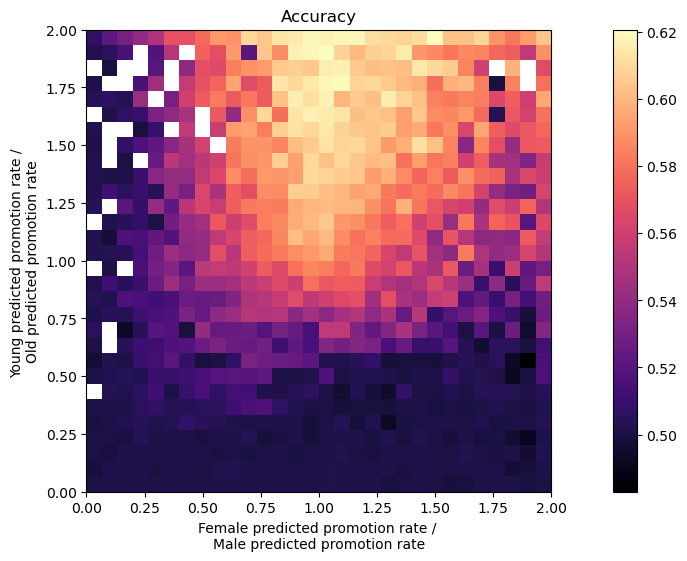

In [47]:
# Populate the archive with the negative sphere function.
# Plot a heatmap of the archive.fitnes

def dibujo():
    plt.figure(figsize=(8, 6))
    grid_archive_heatmap(archive)
    plt.title("Accuracy")
    plt.xlabel(x_prob)
    plt.ylabel(y_prob)
    plt.show()
dibujo()

In [48]:
#models in the fair zone square
t = archive.as_pandas()[(archive.as_pandas().index_0>=12) & (archive.as_pandas().index_1>=12) & (archive.as_pandas().index_0<=17) & (archive.as_pandas().index_1<=17)]

#models in the fair zone square if we use map between 0.5 and 2
# t = archive.as_pandas()[(archive.as_pandas().index_0>=6) & (archive.as_pandas().index_1>=6) & (archive.as_pandas().index_0<=14) & (archive.as_pandas().index_1<=14)]


print( nombre, '\n'
      'dataset =', datatouse, '\n'
      'selection =', selection, '\n'
      'thres = ', thres, '\n'
      'experiment =', EXP_NAME, '\n'
      'map = ', map, '\n'
      'dim =', dim, '\n'
      'iter_scheduled = ', total_itrs, '\n'
      'iter_real =', itr, '\n'
      'network = ', a, b, c, '\n'
      'number of solutions = ', str(len(archive.as_pandas()['index_0'].values)), '\n\n'
      'best accuracy = ', round(archive.as_pandas()['objective'].max(),4), '\n'
      '\t', x_prob, ' = ', round(archive.as_pandas()[archive.as_pandas()['objective']==archive.as_pandas()['objective'].max()]['behavior_0'] ,4).values[0], '\n'
      '\t', y_prob, ' = ', round(archive.as_pandas()[archive.as_pandas()['objective']==archive.as_pandas()['objective'].max()]['behavior_1'] ,4).values[0], '\n'
      'best accuracy unbiased = ', round(t['objective'].max(), 4), '\n'
      '\t', x_prob, ' = ', round(t[t['objective']==t['objective'].max()]['behavior_0'] ,4).values[0], '\n'
      '\t', y_prob, ' = ', round(t[t['objective']==t['objective'].max()]['behavior_1'] ,4).values[0], '\n')




output106 
dataset = data1 
selection = mixed2 
thres =  34 
experiment = test 
map =  prob2 
dim = [[0, 2], [0, 2]] 
iter_scheduled =  100000 
iter_real = 1992 
network =  35 15 1 
number of solutions =  870 

best accuracy =  0.6206 
	 Female predicted promotion rate / 
Male predicted promotion rate  =  1.0651 
	 Young predicted promotion rate / 
Old predicted promotion rate  =  1.9314 
best accuracy unbiased =  0.6047 
	 Female predicted promotion rate / 
Male predicted promotion rate  =  1.004 
	 Young predicted promotion rate / 
Old predicted promotion rate  =  1.1528 



In [52]:
#distance

#best
print(math.dist([1,1],[round(archive.as_pandas()[archive.as_pandas()['objective']==archive.as_pandas()['objective'].max()]['behavior_0'] ,4).values[0],
round(archive.as_pandas()[archive.as_pandas()['objective']==archive.as_pandas()['objective'].max()]['behavior_1'] ,4).values[0]]))

#best fair
print(math.dist([1,1],[round(t[t['objective']==t['objective'].max()]['behavior_0'] ,4).values[0],
round(t[t['objective']==t['objective'].max()]['behavior_1'] ,4).values[0]]))


0.9336723033270292
0.1528523470542733


In [ ]:
import os
os.system("say -v Paulina 'ya esta listo'")



0

In [ ]:
#save the results for this run
archive.as_pandas().to_pickle('./'+nombre+'.pkl')


In [57]:
archive=pd.read_pickle('./output105.pkl')

In [58]:
t = archive[(archive.index_0>=12) & (archive.index_1>=12) & (archive.index_0<=17) & (archive.index_1<=17)]

print( 
      'number of solutions = ', str(len(archive['index_0'].values)), '\n\n'
      'best accuracy = ', round(archive['objective'].max(),4), '\n'
      '\t fem/mal = ', round(archive[archive['objective']==archive['objective'].max()]['behavior_0'] ,4).values[0], '\n'
      '\t y/old = ', round(archive[archive['objective']==archive['objective'].max()]['behavior_1'] ,4).values[0], '\n'
      'best accuracy unbiased = ', round(t['objective'].max(), 4), '\n'
      '\t fem/mal = ', round(t[t['objective']==t['objective'].max()]['behavior_0'] ,4).values[0], '\n'
      '\t y/old = ', round(t[t['objective']==t['objective'].max()]['behavior_1'] ,4).values[0], '\n')


number of solutions =  900 

best accuracy =  0.6428 
	 fem/mal =  1.4082 
	 y/old =  0.7489 
best accuracy unbiased =  0.641 
	 fem/mal =  0.8505 
	 y/old =  0.9179 



In [59]:
print(math.dist([1,1],[round(archive[archive['objective']==archive['objective'].max()]['behavior_0'] ,4).values[0],
 round(archive[archive['objective']==archive['objective'].max()]['behavior_1'] ,4).values[0]]))

#best fair
print(math.dist([1,1],[round(t[t['objective']==t['objective'].max()]['behavior_0'] ,4).values[0],
round(t[t['objective']==t['objective'].max()]['behavior_1'] ,4).values[0]]))


0.4792477960304042
0.17055984287047166
